In [26]:
import pandas as pd
import zipfile
import kaggle
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
from PIL import Image

plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (13, 7)

ModuleNotFoundError: No module named 'cv2'

In [2]:
!kaggle datasets download -d biminhc/tiki-books-dataset


  0%|          | 0.00/7.51M [00:00<?, ?B/s]
 13%|#3        | 1.00M/7.51M [00:00<00:05, 1.17MB/s]
 27%|##6       | 2.00M/7.51M [00:01<00:03, 1.88MB/s]
 53%|#####3    | 4.00M/7.51M [00:01<00:01, 3.66MB/s]
 67%|######6   | 5.00M/7.51M [00:01<00:00, 4.24MB/s]
 80%|#######9  | 6.00M/7.51M [00:01<00:00, 4.51MB/s]
 93%|#########3| 7.00M/7.51M [00:01<00:00, 4.90MB/s]
100%|##########| 7.51M/7.51M [00:02<00:00, 3.83MB/s]


In [3]:
zipfile_name = 'tiki-books-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
id_df = pd.read_csv("book_id.csv")
data_df = pd.read_csv("book_data.csv")
cmt_df = pd.read_csv("comments.csv")

In [5]:
data_df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1796 non-null   int64  
 1   title           1796 non-null   object 
 2   authors         1653 non-null   object 
 3   original_price  1796 non-null   int64  
 4   current_price   1796 non-null   int64  
 5   quantity        1751 non-null   float64
 6   category        1796 non-null   object 
 7   n_review        1796 non-null   int64  
 8   avg_rating      1796 non-null   float64
 9   pages           1546 non-null   object 
 10  manufacturer    1523 non-null   object 
 11  cover_link      1796 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 168.5+ KB


In [8]:
id_df

,id
0,74021317
1,74021317
2,184466860
3,73787185
4,52789367
...,...
2019,192949122
2020,157579054
2021,20704715
2022,131144753


In [9]:
data_df.isnull().sum()

product_id          0
title               0
authors           143
original_price      0
current_price       0
quantity           45
category            0
n_review            0
avg_rating          0
pages             250
manufacturer      273
cover_link          0
dtype: int64

In [15]:
data_df.duplicated().value_counts()

False    1777
True       19
dtype: int64

In [17]:
#Remove duplicates

data_df.drop_duplicates(inplace = True)
data_df[data_df.duplicated()]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link


In [18]:
data_df.authors.value_counts()

Nguyễn Nhật Ánh    24
Higashino Keigo    20
.                  18
Thích Nhất Hạnh    16
Haruki Murakami    15
                   ..
Urako Kanamori      1
Cổ Viên             1
Robert Winston      1
Yongchul Kwon       1
John C. Maxwell     1
Name: authors, Length: 1083, dtype: int64

In [21]:
#Replace "." authors to 'Unknown' and fill the NaN values

data_df.loc[data_df.authors == '.' , 'authors'] = "Unknown"
data_df.authors = data_df.authors.fillna("Unknown")

In [24]:
data_df.authors.value_counts()

Unknown            158
Nguyễn Nhật Ánh     24
Higashino Keigo     20
Thích Nhất Hạnh     16
Haruki Murakami     15
                  ... 
Urako Kanamori       1
Cổ Viên              1
Robert Winston       1
Yongchul Kwon        1
John C. Maxwell      1
Name: authors, Length: 1083, dtype: int64

In [56]:
#Fill empty quantity by the medium value

data_df.quantity = data_df.quantity.fillna(np.mean(data_df.quantity))


In [27]:
data_df.category.value_counts()

Sách tư duy - Kỹ năng sống                 295
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       56
                                          ... 
Bá Tước Tiểu Thư - Tập 5                     1
Shaman King - Tập 19                         1
Blue Period - Tập 07                         1
Komi - Nữ Thần Sợ Giao Tiếp - Tập 14         1
Kaguya-Sama: Cuộc Chiến Tỏ Tình - Tập 3      1
Name: category, Length: 355, dtype: int64

In [29]:
# There is a lot of wrong value, therefore just take top 40 of category

data_df.category.value_counts().head(40)

Sách tư duy - Kỹ năng sống                 295
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       56
Bài học kinh doanh                          53
Truyện trinh thám                           52
Sách Học Tiếng Anh                          42
Sách Marketing - Bán hàng                   40
Sách tài chính, tiền tệ                     40
Tác phẩm kinh điển                          38
Truyện Giả tưởng - Huyền Bí - Phiêu Lưu     37
Kiến thức - Bách khoa                       33
Sách Làm Cha Mẹ                             32
Lĩnh vực khác                               31
Kiến Thức Bách Khoa                         23
Truyện dài                                  23
Văn học thiếu nhi                           21
Light novel                                 19
Truyện đam mỹ                               18
Sách quản trị, lãnh đạo                     18
Truyện kể cho

In [30]:
keeping_values = list(pd.DataFrame(data_df.category.value_counts()[1:40]).T.columns)
keeping_values

['Tiểu Thuyết',
 'Truyện ngắn - Tản văn - Tạp Văn',
 'Sách nghệ thuật sống đẹp',
 'Sách kỹ năng làm việc',
 'Bài học kinh doanh',
 'Truyện trinh thám',
 'Sách Học Tiếng Anh',
 'Sách Marketing - Bán hàng ',
 'Sách tài chính, tiền tệ',
 'Tác phẩm kinh điển',
 'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu',
 'Kiến thức - Bách khoa',
 'Sách Làm Cha Mẹ',
 'Lĩnh vực khác',
 'Kiến Thức Bách Khoa',
 'Truyện dài',
 'Văn học thiếu nhi',
 'Light novel',
 'Truyện đam mỹ',
 'Sách quản trị, lãnh đạo',
 'Truyện kể cho bé',
 'Tiểu sử - Hồi ký',
 'Lịch Sử Thế Giới',
 'Sách Chiêm Tinh - Horoscope',
 'Truyện tranh Ehon',
 'Sách Học Tiếng Hoa',
 'Sách giáo dục',
 'Sách kinh tế học',
 'Tô màu - Luyện chữ  ',
 'Thơ',
 'Sách khởi nghiệp',
 'Truyện tranh thiếu nhi',
 'Sách Nấu ăn',
 'Sách Luyện Thi Đại Học - Cao Đẳng',
 'Triết Học',
 'Du ký',
 'Sách Tâm Lý Tuổi Teen',
 'Lịch Sử Việt Nam',
 'Mỹ Thuật - Kiến Trúc']

In [31]:
def handle_category(category):
    if category not in keeping_values:
        return "Others"
    return category

data_df.category = data_df.category.apply(lambda category: handle_category(category))

In [35]:
data_df.category.value_counts()

Others                                     690
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       56
Bài học kinh doanh                          53
Truyện trinh thám                           52
Sách Học Tiếng Anh                          42
Sách tài chính, tiền tệ                     40
Sách Marketing - Bán hàng                   40
Tác phẩm kinh điển                          38
Truyện Giả tưởng - Huyền Bí - Phiêu Lưu     37
Kiến thức - Bách khoa                       33
Sách Làm Cha Mẹ                             32
Lĩnh vực khác                               31
Truyện dài                                  23
Kiến Thức Bách Khoa                         23
Văn học thiếu nhi                           21
Light novel                                 19
Truyện kể cho bé                            18
Sách quản trị, lãnh đạo                     18
Truyện đam mỹ

In [36]:
def handle_pages(lst_pages):
    lst_int = []
    for page in lst_pages:
        try:
            lst_int.append(int(page))
        except:
            continue
            
    return np.mean(lst_int)
    
mean_pages = handle_pages(list(data_df.pages))

In [37]:
data_df.pages = data_df.pages.fillna(str(mean_pages))

In [41]:
data_df.query('pages == "Cuốn"')

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
1266,197639028,Động Từ Bất Quy Tắc Và Ngữ Pháp Tiếng Anh Căn Bản,Mai Lan Hương,18000,12000,136.0,Sách Học Tiếng Anh,2,5.0,Cuốn,Nhà Xuất Bản Đà Nẵng,https://salt.tikicdn.com/ts/product/28/8e/9e/0...


In [42]:
# Remove "Cuốn"

data_df = data_df.query('pages != "Cuốn"')

In [43]:
data_df.pages = data_df.pages.apply(lambda page: round(float(page)))
data_df.pages = data_df.pages.astype("int64")

In [44]:
data_df.pages.describe()

count      1776.000000
mean        455.341779
std        4551.294976
min          10.000000
25%         220.000000
50%         332.000000
75%         455.000000
max      192000.000000
Name: pages, dtype: float64

In [45]:
# Remove the unexpected pages value
data_df[data_df.pages > 3000]

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
650,201687274,Có Một Nổi Buồn Vừa Ngang Qua Đây,Gã,88000,64900,114.0,Truyện ngắn - Tản văn - Tạp Văn,6,5.0,192000,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/08/fd/a5/0...


In [46]:
data_df = data_df.query('pages < 3000')

In [50]:
data_df.manufacturer.value_counts()

Nhà Xuất Bản Thế Giới                            249
NXB Trẻ                                          145
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           98
Nhà Xuất Bản Tổng hợp TP.HCM                      92
Nhà Xuất Bản Lao Động                             90
Nhà Xuất Bản Văn Học                              76
Nhà Xuất Bản Hồng Đức                             57
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              16
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                              7
Nhà Xuất Bản Lao Động Xã Hội                  

In [51]:
#Group same value but written in difference ways

def handle_manufactuner(manufactuner):
    if manufactuner == "hong duc":
        return "Nhà Xuất Bản Hồng Đức"
    elif manufactuner == "NXB Dân Trí":
        return "Nhà Xuất Bản Dân Trí"
    elif manufactuner == "ĐHQG Hà Nội":
        return "Nhà Xuất Bản Đại Học Quốc Gia Hà Nội"
    else:
        return manufactuner
    
data_df.manufacturer = data_df.manufacturer.apply(lambda manufacturer: handle_manufactuner(manufacturer))

In [52]:
data_df.manufacturer = data_df.manufacturer.fillna("Unknown")

In [53]:
data_df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...


In [54]:
# We have both original and current prices, let create discount column.

data_df['discount'] = round(1 - data_df['current_price']/data_df['original_price'],2)


In [57]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1775 non-null   int64  
 1   title           1775 non-null   object 
 2   authors         1775 non-null   object 
 3   original_price  1775 non-null   int64  
 4   current_price   1775 non-null   int64  
 5   quantity        1775 non-null   float64
 6   category        1775 non-null   object 
 7   n_review        1775 non-null   int64  
 8   avg_rating      1775 non-null   float64
 9   pages           1775 non-null   int64  
 10  manufacturer    1775 non-null   object 
 11  cover_link      1775 non-null   object 
 12  discount        1774 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 194.1+ KB


In [58]:
#Change Datatype

data_df.title = data_df.title.astype("string")
data_df.authors = data_df.authors.astype("string")
data_df.category = data_df.category.astype("string")
data_df.manufacturer = data_df.manufacturer.astype("string")
data_df.cover_link = data_df.cover_link.astype("string")

data_df.quantity = data_df.quantity.apply(lambda quantity: round(float(quantity)))
data_df.quantity = data_df.quantity.astype("int64")

In [60]:
#Save file 
data_df.to_excel("prepared_data_book.xlsx", sheet_name = 'Data')

In [ ]:
# Exploratory Data Analysis (EDA)

In [64]:
data_df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...,0.4
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Others,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...,0.3
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...,0.4
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...,0.4
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Unknown,135000,81000,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/2f/b5/4e/a...,0.4


In [61]:
eda_df = data_df.drop(['product_id', 'cover_link'], axis=1)

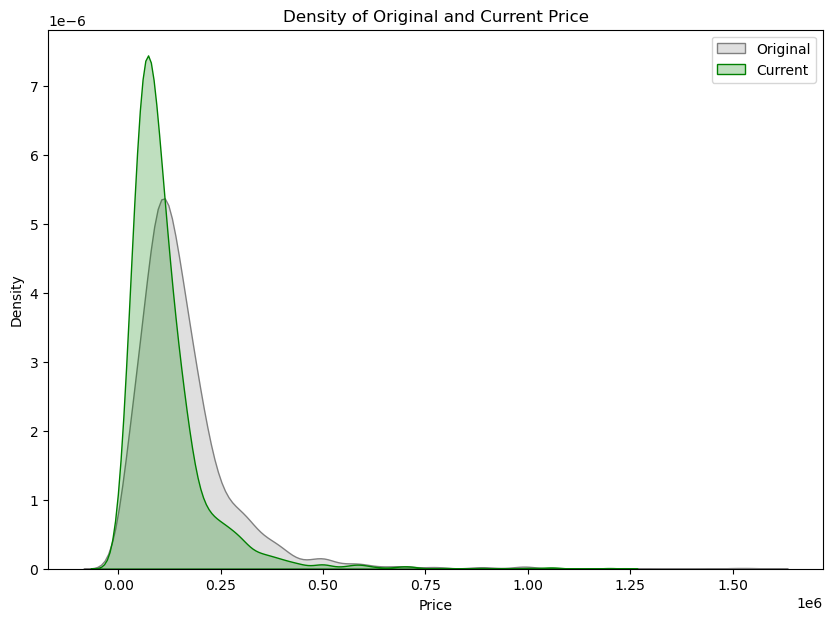

In [73]:
fig = plt.subplots(figsize=(10, 7))

ax = sns.kdeplot(eda_df.original_price, color='gray', fill=True, label='Original')
ax = sns.kdeplot(eda_df.current_price, color='g', fill=True, label='Current')

plt.xlabel('Price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

In [ ]:
#Look at the picture, the price of almost books is less than 500.000vnd
#There is a intering thing, that the price of books in Vietnam is so cheap.


In [ ]:
# We will focus on the discount baseded on category.

In [65]:
# Finding the mean of discount for each category.
eda_df.groupby('category').discount.mean()

category
Bài học kinh doanh                         0.263962
Du ký                                      0.171250
Kiến Thức Bách Khoa                        0.311739
Kiến thức - Bách khoa                      0.308485
Light novel                                0.250000
Lĩnh vực khác                              0.316774
Lịch Sử Thế Giới                           0.314286
Lịch Sử Việt Nam                           0.391429
Mỹ Thuật - Kiến Trúc                       0.253333
Others                                     0.224058
Sách Chiêm Tinh - Horoscope                0.259286
Sách Học Tiếng Anh                         0.310750
Sách Học Tiếng Hoa                         0.182857
Sách Luyện Thi Đại Học - Cao Đẳng          0.332500
Sách Làm Cha Mẹ                            0.308125
Sách Marketing - Bán hàng                  0.254500
Sách Nấu ăn                                0.301250
Sách Tâm Lý Tuổi Teen                      0.245714
Sách giáo dục                              0.291538
Sác

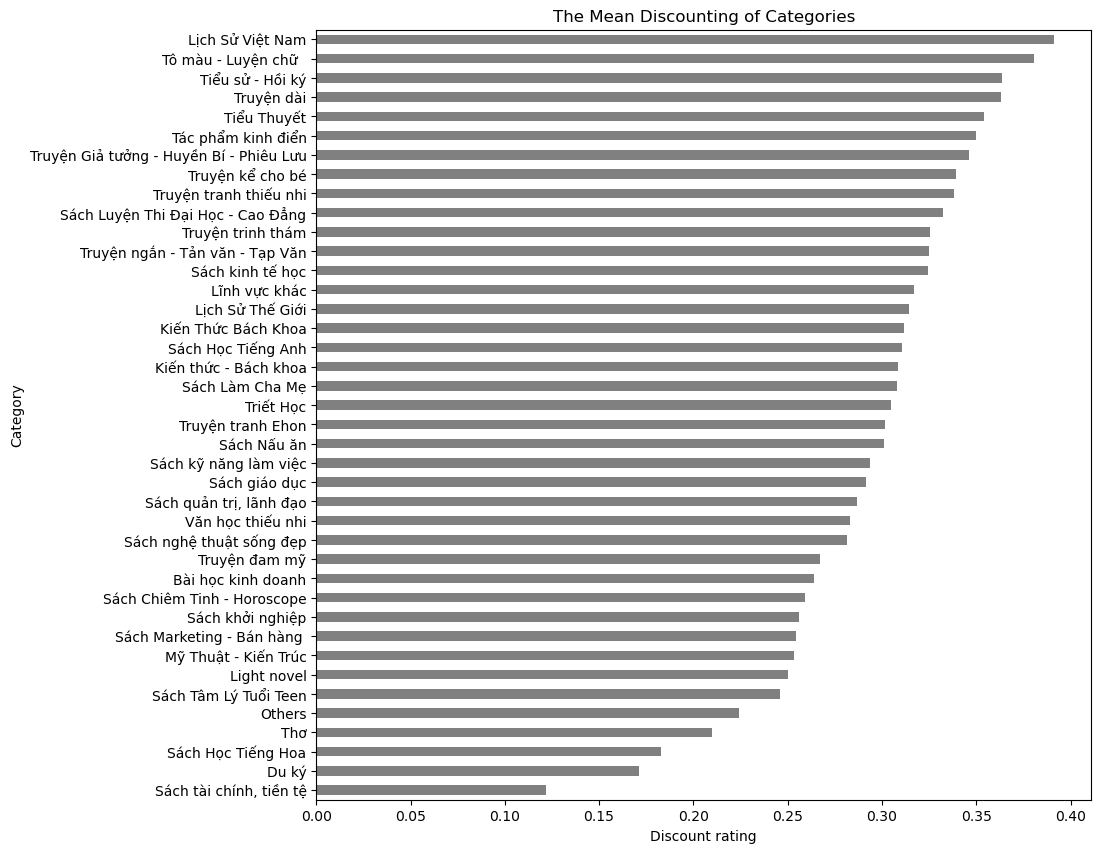

In [66]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').discount.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Discount rating')
plt.ylabel('Category')
plt.title('The Mean Discounting of Categories')
plt.show()

In [ ]:
# Most of the discounted categories is tale (contain 'Truyện')

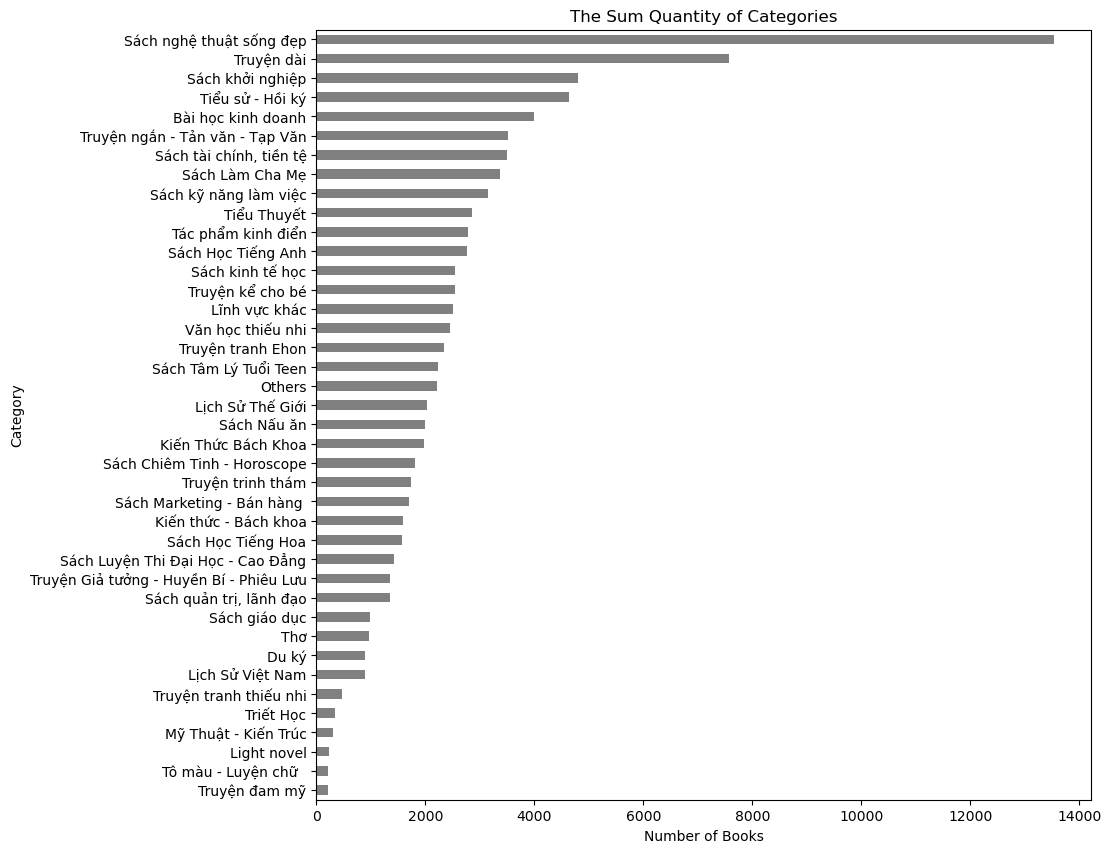

In [67]:
# Let see how the mean of selled books by each category.
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').quantity.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.title('The Sum Quantity of Categories')
plt.show()

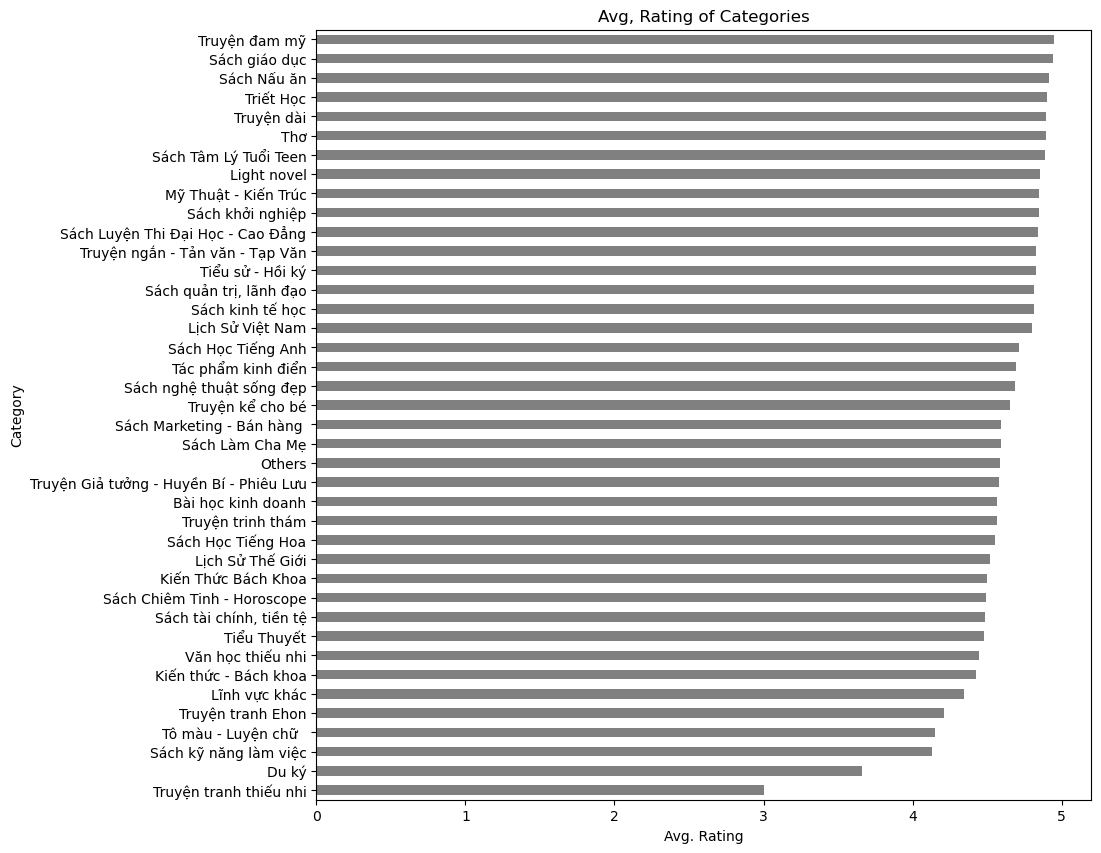

In [68]:
#Rating per Category
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('category').avg_rating.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Avg. Rating')
plt.ylabel('Category')
plt.title('Avg, Rating of Categories')
plt.show()

In [69]:
# All of categories have the mean of average rating larger than 4.0.

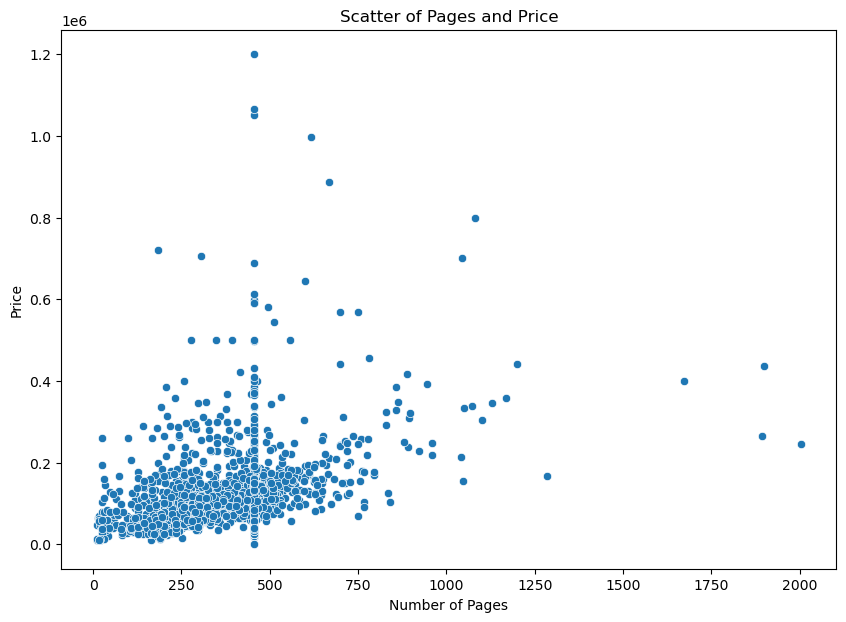

In [70]:
# Check the link between pages and price
#The more pages, the more expensive?

fig = plt.subplots(figsize=(10, 7))

ax=sns.scatterplot(data=eda_df, x='pages', y='current_price')#, color="",color_continuous_scale='RdBu_r')

plt.xlabel('Number of Pages')
plt.ylabel('Price')
plt.title('Scatter of Pages and Price')
plt.show()

In [ ]:
#Not exactly that more pages, more expensive
#The books have highest prices is around 400-700 pages

In [ ]:
# What is the best seller book?

# The assumsion is that the book always in top 5 of:
#Quantity
#Number of Reviews
#Average Rating

In [74]:
def sort_title_by_col(col):
    res = eda_df.groupby("title")[col].max()\
        .sort_values(ascending=False)\
        .index.tolist()
    
    return res

In [75]:
quantity_lst = sort_title_by_col("quantity")
n_reviews_lst = sort_title_by_col("n_review")
avg_rating_lst = sort_title_by_col("avg_rating")

In [76]:
def top_k_common_elements(list1, list2, list3, k=10):
    list1, list2, list3 = list1[:k], list2[:k], list3[:k]
    return list(set(list1) & set(list2) & set(list3))
        
result = top_k_common_elements(quantity_lst, n_reviews_lst, avg_rating_lst, 200)
result

['Muôn Kiếp Nhân Sinh 2',
 'Muôn Kiếp Nhân Sinh (Bìa Cứng)',
 'Làm Bạn Với Bầu Trời (Bìa Mềm) (Tặng Kèm Khung Ảnh Số Lượng Có Hạn)',
 'Từ Tốt Đến Vĩ Đại (Tái bản 2021)',
 'Không Sợ Chậm Chỉ Sợ Dừng\xa0',
 'Giải Thích Ngữ Pháp Tiếng Anh (Với Bài Tập Và Đáp Án) (Tái Bản)']

In [ ]:
# In the top 200 of the defined-assumption, we found some titles. Let see these book(s)!

In [77]:
eda_df.loc[eda_df.title.isin(result)].reset_index(drop=True)

,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,discount
0,Giải Thích Ngữ Pháp Tiếng Anh (Với Bài Tập Và ...,Mai Lan Hương,220000,151800,5616,Sách Học Tiếng Anh,1014,5.0,560,Nhà Xuất Bản Đà Nẵng,0.31
1,Không Sợ Chậm Chỉ Sợ Dừng,Vãn Tình,129000,83001,13655,Sách nghệ thuật sống đẹp,2802,5.0,364,Nhà Xuất Bản Thế Giới,0.36
2,Từ Tốt Đến Vĩ Đại (Tái bản 2021),Unknown,130000,93800,8235,Sách kinh tế học,1119,5.0,484,NXB Trẻ,0.28
3,Muôn Kiếp Nhân Sinh (Bìa Cứng),Nguyên Phong,228000,150400,7391,Others,1421,5.0,424,Nhà Xuất Bản Tổng hợp TP.HCM,0.34
4,Làm Bạn Với Bầu Trời (Bìa Mềm) (Tặng Kèm Khung...,Nguyễn Nhật Ánh,110000,75001,26282,Truyện dài,2043,5.0,220,Unknown,0.32
5,Muôn Kiếp Nhân Sinh 2,Nguyên Phong,268000,176800,23606,Others,5447,5.0,540,Nhà Xuất Bản Tổng hợp TP.HCM,0.34
